In [1]:
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [2]:
import pandas as pd

from darts.timeseries import TimeSeries
from darts.models import ExponentialSmoothing

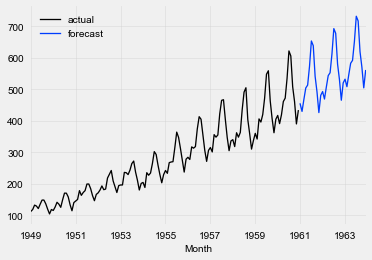

In [3]:
df = pd.read_csv('AirPassengers.csv')
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')

################################

model = ExponentialSmoothing()
model.fit(series)
forecast = model.predict(36)

################################

series.plot(label="actual")
forecast.plot(label="forecast")

plt.legend()
plt.show()

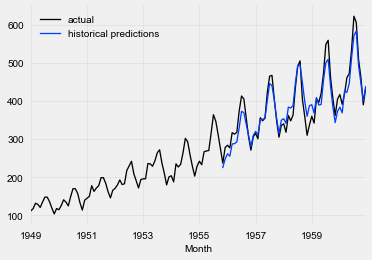

In [4]:
##############################

historical_predictions = model.backtest(series, start=0.5, forecast_horizon=12)

##############################

series.plot(label="actual")
historical_predictions.plot(label="historical predictions")

plt.legend()
plt.show()

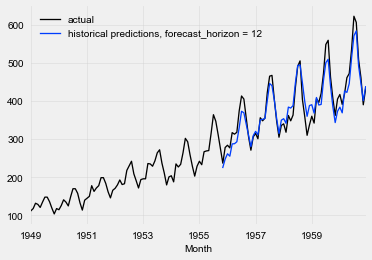

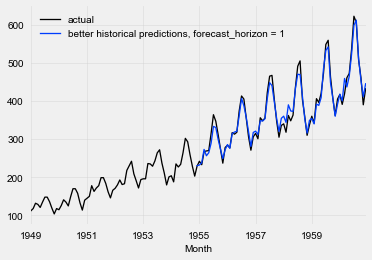

In [5]:
better_historical_predictions = model.backtest(series, start=0.5, forecast_horizon=1)

series.plot(label="actual")
historical_predictions.plot(label="historical predictions, forecast_horizon = 12")

plt.legend()
plt.show()

series.plot(label="actual")
better_historical_predictions.plot(label="better historical predictions, forecast_horizon = 1")

plt.legend()
plt.show()

In [6]:
############################

from darts.metrics import mape
score = mape(series, historical_predictions)

############################

print(score)

5.6087268534725725


In [7]:
score2 = mape(series, better_historical_predictions)

print(score2)

3.0837866916876107


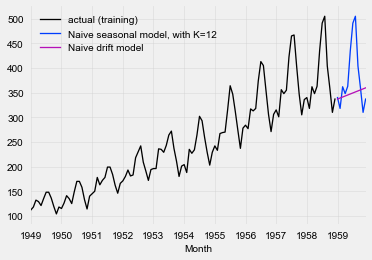

In [8]:
from darts.models import NaiveSeasonal, NaiveDrift
from darts.models import RegressionEnsembleModel

training, validation = series.split_before(pd.Timestamp('1959-01-01'))

###############################

forecasting_models = [NaiveSeasonal(12), NaiveDrift()]

###############################

training.plot(label="actual (training)")

for model in forecasting_models:
    model.fit(training)
    forecast = model.predict(12)
    forecast.plot(label=str(model))

plt.legend()
plt.show()

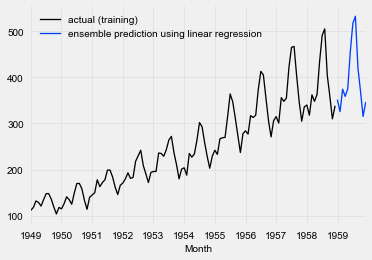

In [9]:
###############################

ensemble_model = RegressionEnsembleModel(forecasting_models, regression_train_n_points=12)
ensemble_model.fit(training)
forecast = ensemble_model.predict(12)

###############################

training.plot(label="actual (training)")
forecast.plot(label="ensemble prediction using linear regression")

plt.legend()
plt.show()

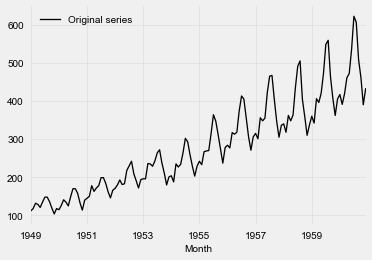

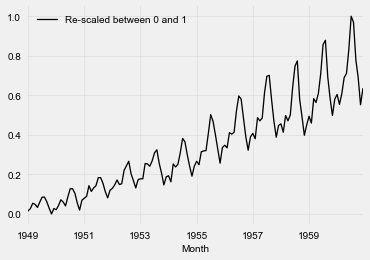

In [10]:
from darts.dataprocessing.transformers import Scaler

###############################

scaler = Scaler()
scaler.fit(series)  # Learn min and max from the data
rescaled = scaler.transform(series)

###############################

series.plot(label="Original series")
plt.legend()
plt.show()

rescaled.plot(label="Re-scaled between 0 and 1")
plt.legend()
plt.show()


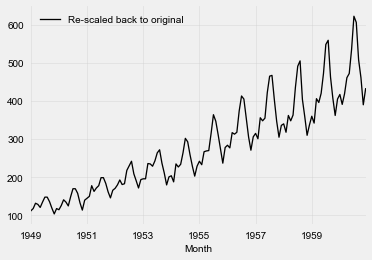

In [11]:
###############################

back = scaler.inverse_transform(rescaled)

###############################

back.plot(label="Re-scaled back to original")
plt.legend()
plt.show()

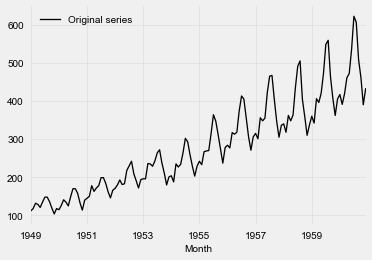

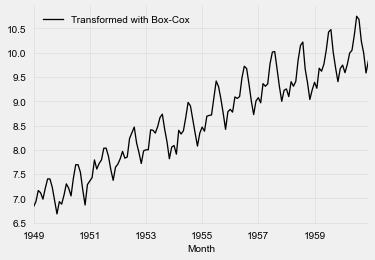

In [12]:
from darts.dataprocessing.transformers import BoxCox

###############################

boxcox = BoxCox()
transformed = boxcox.fit_transform(series)  # fit() estimates an optimal value for lambda

###############################

series.plot(label="Original series")
plt.legend()
plt.show()

transformed.plot(label="Transformed with Box-Cox")
plt.legend()
plt.show()

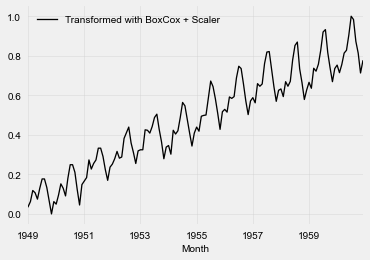

In [13]:
from darts.dataprocessing import Pipeline

###############################

pipeline = Pipeline([BoxCox(), Scaler()])
transformed = pipeline.fit_transform(series)

###############################

transformed.plot(label="Transformed with BoxCox + Scaler")
plt.legend()
plt.show()